Show basic counts. While loading the records, we limit the period to reduce loading and processing time

In [1]:
from __future__ import absolute_import, division, print_function
from multiprocessing import Pool

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Config and load

In [2]:
import sys
sys.path.insert(0, '../../src/data/')

from config import *

In [3]:
#Preparing the members and beacons metadata
members_metadata = pd.read_csv(members_metadata_path).set_index('member')
beacons_metadata = pd.read_csv(beacons_metadata_path).set_index('beacon')

In [4]:
bin_size = 15 #minutes

# Counts

In [5]:
# Set period of interest
period_start  = '2018-06-19 00:00:00-04:00'
period_end    = '2018-06-19 23:59:30-04:00'
period_cond = "datetime >= period_start & datetime < period_end"

## Count records
Show the number of records colleted by the system. Uses "dirty" data (before filtering)

In [6]:
m2badge_dirty = pd.read_hdf(dirty_store_path,'proximity/member_to_badge', where = period_cond, data_columns= True)

In [7]:
df = m2badge_dirty.reset_index().set_index('datetime') # Removes the level "member" from index, keeps time
df = df.groupby([
    pd.Grouper(level=0, freq='15min') # level 0 should be datetime
])[['count']].count()

df = df.resample('15min').asfreq() # ensure we have values for every 15 minutes interval
df = df.fillna(value=0.0)

m2badge_dirty_totals = df.copy()

2019-04-29 18:31:27,041 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/orenled/Envs/rhythm-private-analysis-deltav17/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


Text(0.5,1,'Number of raw records')

2019-04-29 18:31:27,349 - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/home/orenled/Envs/rhythm-private-analysis-deltav17/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


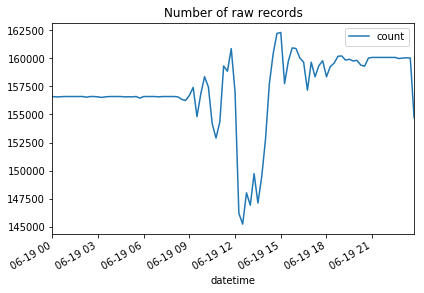

In [8]:
ax = m2badge_dirty_totals.plot()
plt.tight_layout()
ax.set_title("Number of raw records")

## Count active badges
Using the badge-to-beacon dataset since it's smaller

In [9]:
m2b_clean = pd.read_hdf(clean_store_path,'proximity/member_to_beacon', where = period_cond, data_columns= True)

In [10]:
df = m2b_clean.reset_index().set_index('datetime') # Removes the level "member" from index, keeps time
df = df.groupby([
    pd.Grouper(level=0, freq='15min') # level 0 should be datetime
]).member.nunique()

df = df.resample('15min').asfreq() # ensure we have values for every 15 minutes interval
m2b_active_badges = df.fillna(value=0.0)

Text(0.5,1,'Number of badges seen by the system')

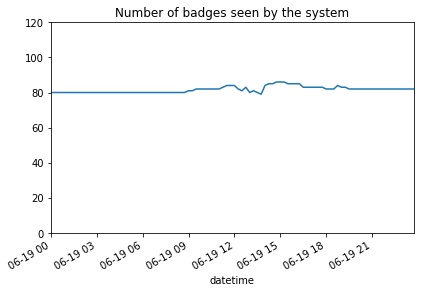

In [11]:
ax = m2b_active_badges.plot()
ax.set_ylim([0,120])
plt.tight_layout()
ax.set_title("Number of badges seen by the system")

## Average RSSI - to other members
Shows the average distance between two badges. We use the member-to-member dataset, which includes badges taht were left on the board. Therefore, we expect to see the average distance decreases during the day (most badges are taken off the board) and then increases towards the end of the work day.

In [12]:
m2m_clean = pd.read_hdf(clean_store_path,'proximity/member_to_member', where = period_cond, data_columns= True)

In [13]:
df = m2m_clean.reset_index().set_index('datetime') # Removes the level "member" from index, keeps time
df = df.groupby([
    pd.Grouper(level=0, freq='15min') # level 0 should be datetime
]).rssi_max.mean()
#[['member']].count()

df = df.resample('15min').asfreq() # ensure we have values for every 15 minutes interval
df = df.fillna(value=0.0)

m2m_mean_rssi = df.copy()

Text(0.5,1,'Average signal strength between badges (including badges on the board)')

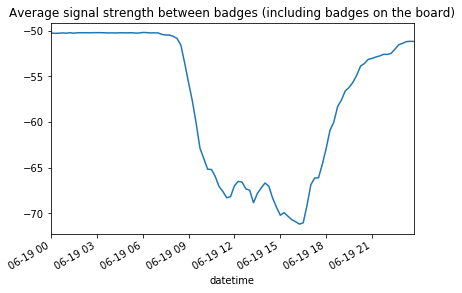

In [14]:
ax = m2m_mean_rssi.plot()
plt.tight_layout()
ax.set_title("Average signal strength between badges (including badges on the board)")